In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import SGDClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [3]:
#%%
'''''
Columns	      Description

age	          Age in years
ed	          Level of education (1=Did not complete high school, 2=High school degree, 3=Some college, 4= college degree, 5=Post-undergraduate degree)
employ	      Years with current employer
address	      Years at current address
income	      Household income in thousands
debtinc	      Debt to income ratio (x100)
creddebt	  Credit card debt in thousands
othdebt	      Other debt in thousands
default	      Previously defaulted (1= defaulted, 0=Never defaulted)

'''''

sns.set_theme()
IMAGES = "images"
if not os.path.exists("images"):
    os.mkdir(IMAGES)

In [4]:
loan = pd.read_csv('bankloan.csv')

# loan.describe() 

# loan.info() 

for col in ['ed','default']:
    loan[col] = loan[col].astype('category')

loan.head(10)  

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,35.9,11.90,0.504108,3.767992,0
1,30,1,13,8,46.7,17.88,1.352694,6.997266,0
2,40,1,15,14,61.8,10.64,3.438997,3.136523,0
3,41,1,15,14,72.0,29.67,4.165668,17.196732,0
4,57,1,7,37,25.6,15.86,1.498199,2.561961,0
5,45,1,0,13,28.1,4.28,0.924861,0.277819,0
6,36,1,1,3,19.6,12.82,1.211131,1.301589,1
7,39,1,20,9,80.5,12.32,1.854591,8.063009,0
8,43,1,12,11,68.7,6.82,1.429029,3.256311,0
9,34,3,7,12,33.8,10.71,1.422652,2.197328,0


In [5]:
#%%
# Number of people who did and did not defaulted in the past
#To check if our dataset is balanced
print(loan["default"].value_counts())
print(loan["default"].value_counts(normalize=True))

0    3744
1    1256
Name: default, dtype: int64
0    0.7488
1    0.2512
Name: default, dtype: float64


In [6]:
#To check if our dataset is balanced
loan.groupby("default").mean()

C:\Users\MoZeA\AppData\Local\Temp\ipykernel_27400\1485048505.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan.groupby("default").mean()


,age,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,
0,36.236645,9.782051,8.974893,48.908600,8.612946,1.297557,2.895339
1,32.855096,5.489650,5.707006,44.005653,14.437142,2.613296,4.182136


In [7]:
# Plotting Box Plots
variables = ["age", "ed", "employ","address","debtinc","creddebt","othdebt"]
for y in variables:
    if y!="ed":
        sns.boxplot(data=loan ,x="default",y=y)
        plt.savefig(f"{IMAGES}/boxplot_{y}.png")
        plt.clf()
# Histogram by Default classes   
for x in variables:
    sns.displot(data=loan ,x=x,hue='default')
    plt.savefig(f"{IMAGES}/histhue_{x}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

<Figure size 563.5x500 with 0 Axes>

In [8]:
X=loan[loan.columns.drop('default')].values
y=loan["default"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44,stratify=y)


c:\Users\MoZeA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy =  0.798
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       749
           1       0.64      0.43      0.52       251

    accuracy                           0.80      1000
   macro avg       0.74      0.68      0.70      1000
weighted avg       0.78      0.80      0.78      1000



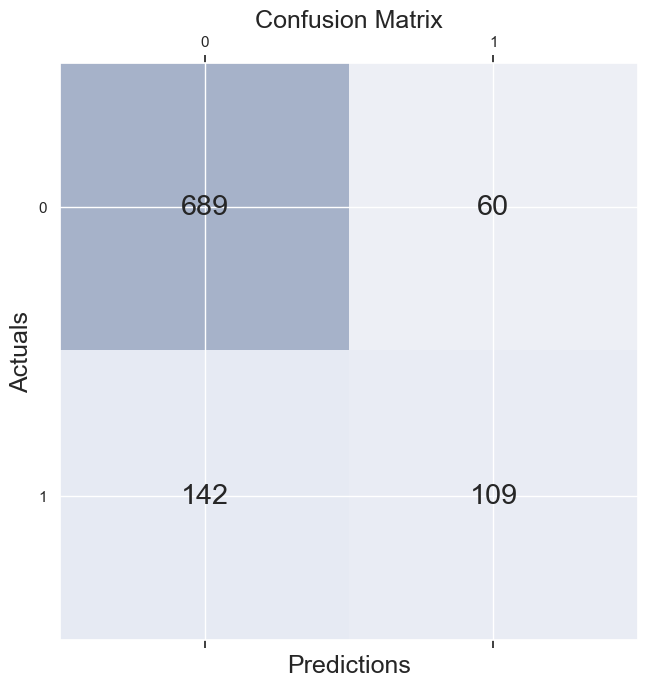

 The result is telling us that we have:  798 correct predictions
 The result is telling us that we have:  202 incorrect predictions
 We have a total predictions of:  1000


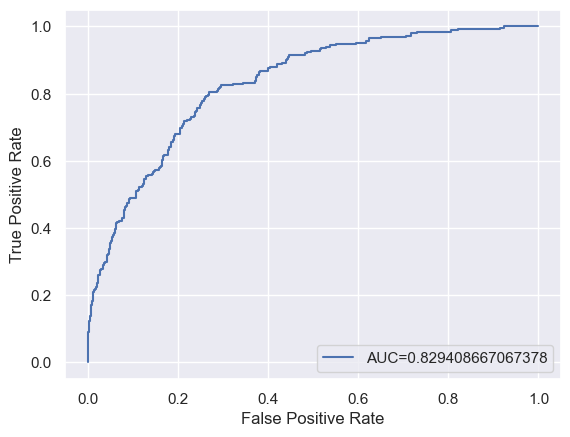

In [9]:

log_reg = LogisticRegression(solver='lbfgs', random_state=44)
log_reg.fit(X_train, y_train)



Y_predictions = log_reg.predict(X_test) # Predicting the target variable in the test set
print('Logistic Regression accuracy = ', accuracy_score(Y_predictions,y_test))


conf_matrix = confusion_matrix(y_test, Y_predictions)
#print(conf_matrix)
print(classification_report(y_test, Y_predictions))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("\033[1m The result is telling us that we have: ",(conf_matrix[0,0]+conf_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(conf_matrix[0,1]+conf_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(conf_matrix.sum()))


y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [10]:
rand_forest = RandomForestClassifier(random_state=44)
rand_forest.fit(X_train, y_train)

Y_predictions = rand_forest.predict(X_test) # Predicting the target variable in the test set
print('Random Forest accuracy = ', accuracy_score(Y_predictions,y_test))

conf_matrix = confusion_matrix(y_test, Y_predictions)
# print(conf_matrix)
print(classification_report(y_test, Y_predictions))

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
Y_predictions = sgd.predict(X_test) # Predicting the target variable in the test set

print('S Gradient Descent = ', accuracy_score(Y_predictions,y_test))
conf_matrix = confusion_matrix(y_test, Y_predictions)
#print(conf_matrix)
print(classification_report(y_test, Y_predictions))
# %%

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
Y_predictions = svm.predict(X_test) # Predicting the target variable in the test set
print('Support Vector Machine = ', accuracy_score(Y_predictions,y_test))

conf_matrix = confusion_matrix(y_test, Y_predictions)
# print(conf_matrix)
print(classification_report(y_test, Y_predictions))

Random Forest accuracy =  0.797
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       749
           1       0.65      0.41      0.51       251

    accuracy                           0.80      1000
   macro avg       0.74      0.67      0.69      1000
weighted avg       0.78      0.80      0.78      1000

S Gradient Descent =  0.78
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       749
           1       0.76      0.18      0.29       251

    accuracy                           0.78      1000
   macro avg       0.77      0.58      0.58      1000
weighted avg       0.78      0.78      0.72      1000

Support Vector Machine =  0.794
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       749
           1       0.66      0.37      0.47       251

    accuracy                           0.79      1000
   macro avg       0.74      0.65    

In [11]:
"""""
UNDERSAMPLING
"""""

RUS = RandomUnderSampler(random_state=44)

#Fit the RUS
X_train_rus, y_train_rus= RUS.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))
# %%

[(0, 1005), (1, 1005)]


Logistic Regression accuracy =  0.755


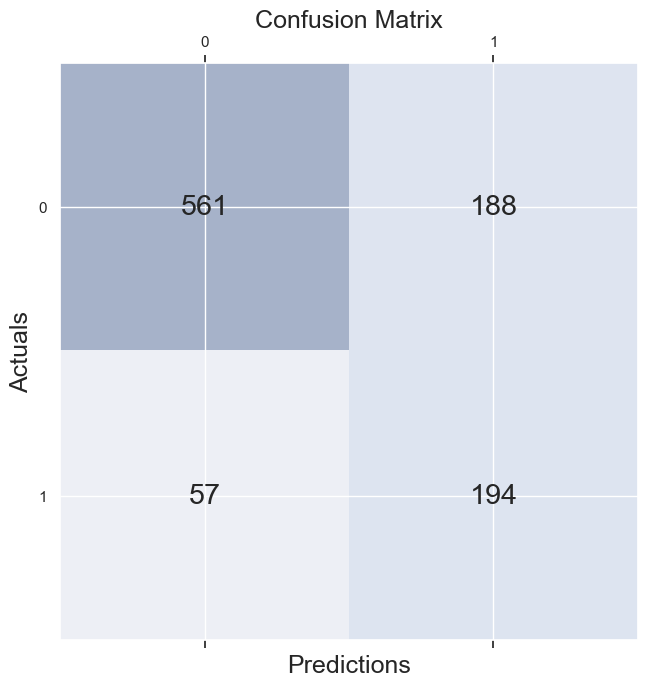

 The result is telling us that we have:  755 correct predictions
 The result is telling us that we have:  245 incorrect predictions
 We have a total predictions of:  1000
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       749
           1       0.51      0.77      0.61       251

    accuracy                           0.76      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.81      0.76      0.77      1000

Score Using CV:  0.7587064676616915


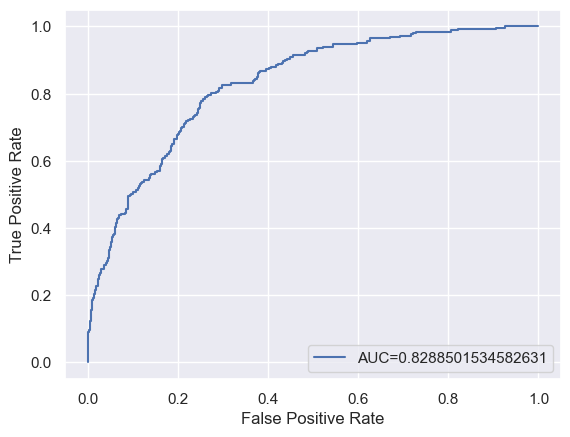

In [12]:
log_reg = LogisticRegression(solver='lbfgs', random_state=44)
log_reg.fit(X_train_rus, y_train_rus)

Y_predictions = log_reg.predict(X_test) # Predicting the target variable in the test set
print('Logistic Regression accuracy = ', accuracy_score(Y_predictions,y_test))

conf_matrix = confusion_matrix(y_test, Y_predictions)
#print(conf_matrix)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print("\033[1m The result is telling us that we have: ",(conf_matrix[0,0]+conf_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(conf_matrix[0,1]+conf_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(conf_matrix.sum()))

print(classification_report(y_test, Y_predictions))
#%%
log_reg_eval=cross_val_score(estimator=log_reg,X=X_train_rus,y=y_train_rus, cv=10)
print("Score Using CV: ", log_reg_eval.mean())
#%%
#Metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#ROC CURVE
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [13]:
#%%
rand_forest = RandomForestClassifier(random_state=44)
rand_forest.fit(X_train_rus, y_train_rus)

Y_predictions = rand_forest.predict(X_test) # Predicting the target variable in the test set
print('Random Forest accuracy = ', accuracy_score(Y_predictions,y_test))

conf_matrix = confusion_matrix(y_test, Y_predictions)
#print(conf_matrix)
print(classification_report(y_test, Y_predictions))

# %%
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_rus, y_train_rus)
Y_predictions = sgd.predict(X_test) # Predicting the target variable in the test set

print('S Gradient Descent = ', accuracy_score(Y_predictions,y_test))
conf_matrix = confusion_matrix(y_test, Y_predictions)
print(conf_matrix)
print(classification_report(y_test, Y_predictions))
#%%
from sklearn.svm import SVC  
svm = SVC(kernel='linear')
svm.fit(X_train_rus, y_train_rus)
Y_predictions = svm.predict(X_test) # Predicting the target variable in the test set
print('Support Vector Machine = ', accuracy_score(Y_predictions,y_test))

conf_matrix = confusion_matrix(y_test, Y_predictions)
print(conf_matrix)
print(classification_report(y_test, Y_predictions))

Random Forest accuracy =  0.716
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       749
           1       0.46      0.75      0.57       251

    accuracy                           0.72      1000
   macro avg       0.68      0.73      0.68      1000
weighted avg       0.78      0.72      0.73      1000

S Gradient Descent =  0.437
[[192 557]
 [  6 245]]
              precision    recall  f1-score   support

           0       0.97      0.26      0.41       749
           1       0.31      0.98      0.47       251

    accuracy                           0.44      1000
   macro avg       0.64      0.62      0.44      1000
weighted avg       0.80      0.44      0.42      1000

Support Vector Machine =  0.749
[[550 199]
 [ 52 199]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       749
           1       0.50      0.79      0.61       251

    accuracy                           0.75 